<a href="https://colab.research.google.com/github/joungminhee/project/blob/master/churn_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
data = '/content/drive/MyDrive/Data/Churn_Modelling.csv'
df = pd.read_csv(data)

* RowNumber : 행번호
* CustomerID : 고객의 아이디
* Surname : 성
* CreditScore : 신용평점
* Geography : 고객이 속한 국가
* Gender : 성별
* Age : 나이
* Tenure : 고객이 은행을 이용한 기간
* Balance : 고객의 은행 잔고
* NumOfProducts : 고객이 사용 중인 은행 상품 수
* HasCrCard : 고객이 은행의 신용 카드를 소유하고 있는지 여부
* IsActiveMember : 고객이 은행의 활성 멤버인가 여부
* EstimatedSalary : 고객의 예상 급여(달러)
* Exited : 고객이 은행 계좌를 폐쇄한 경우 이진 플래그 1, 고객이 유지된 경우 0

In [196]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [198]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [199]:
df.CreditScore.unique() # 앞번호대로 구간화 / age도 구간화해야징~!

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [200]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [201]:
df.describe(include='object')
# 스미스 이름 빈도수가 32개나 됨

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


# 데이터 탐색

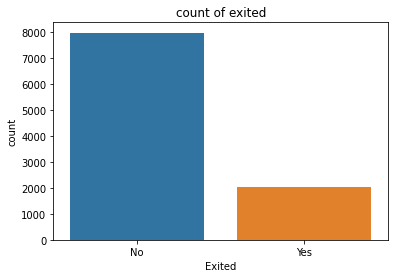

In [202]:
# 이탈율 확인
exited_plt = sns.countplot(x=df.Exited)
exited_plt.set_title('count of exited')
exited_plt.set_xticklabels(['No','Yes'])
# 눈금 이름 설정하기 : set_xticklabels(), set_yticklabels()
plt.show()

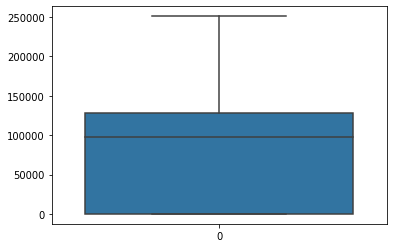

In [203]:
sns.boxplot(data=df['Balance'])
plt.show() 
# 이상치 없음 확인

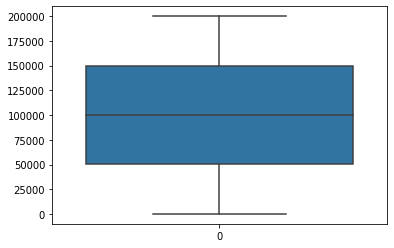

In [204]:
sns.boxplot(data=df['EstimatedSalary'])
plt.show() 
# 이상치 없음 확인

In [205]:
# 성별 이탈율 확인
df.groupby('Exited')['Gender'].value_counts()

Exited  Gender
0       Male      4559
        Female    3404
1       Female    1139
        Male       898
Name: Gender, dtype: int64

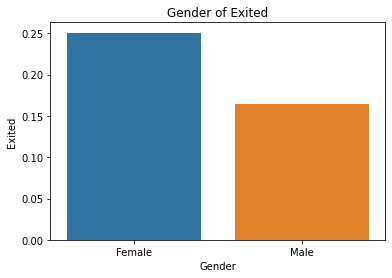

In [206]:
sns.barplot(x=df['Gender'], y=df['Exited'], data=df,ci=None)
plt.title('Gender of Exited')
plt.show()
# 여자가 남자보다 이탈율이 높음

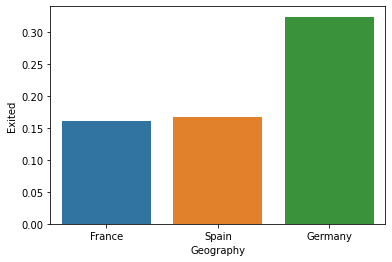

In [207]:
sns.barplot(x= 'Geography', y="Exited", data=df, ci=None)
plt.show()
# 독일 이탈율이 프랑스와 스페인보다 높음 확인

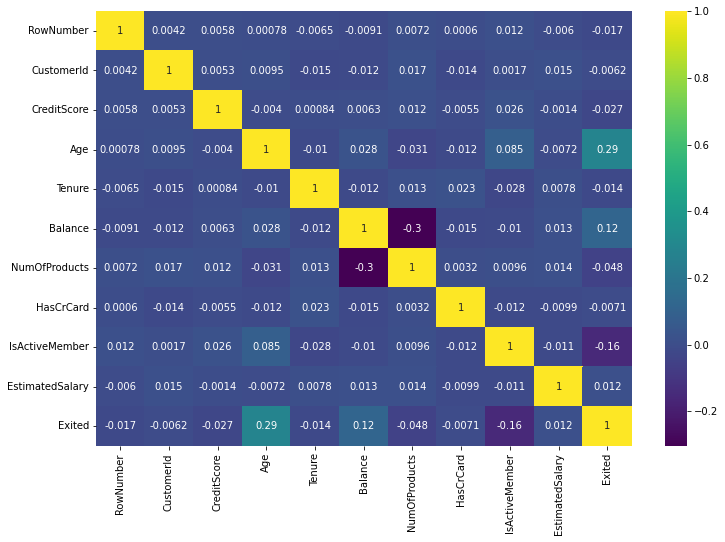

In [208]:
plt.figure(figsize=(12,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='viridis')
plt.show()
# 이탈율 상관관계 그래프

In [209]:
# 회사와 오래 있었던 사람들의 이탈율 확인
df.groupby('Exited')['Tenure'].value_counts()

Exited  Tenure
0       7         851
        2         847
        8         828
        1         803
        5         803
        3         796
        4         786
        6         771
        9         771
        10        389
        0         318
1       1         232
        3         213
        9         213
        5         209
        4         203
        2         201
        8         197
        6         196
        7         177
        10        101
        0          95
Name: Tenure, dtype: int64

<Figure size 864x576 with 0 Axes>

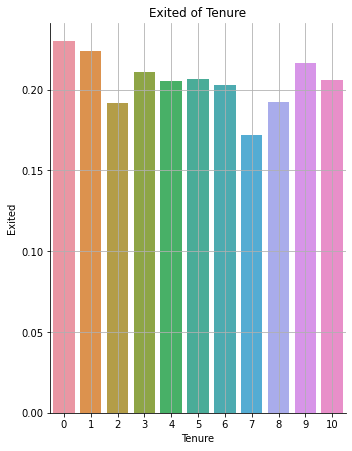

In [210]:
plt.figure(figsize=(12,8))
sns.catplot(x='Tenure', y='Exited',
            data=df,kind='bar', ci=None)
plt.title('Exited of Tenure')
plt.subplots_adjust(top=1.2)
plt.grid()
plt.show()

In [211]:
from matplotlib.gridspec import GridSpec
# 히스토그램과 박스플랏 합쳐서 시각화하기
colors = ['lightcoral','deepskyblue',
          'orchid',    'tomato',
          'teal',      'darkcyan',
          'limegreen', 'darkorange']

def distribution_plt(column, title):
    fig = plt.figure(figsize=(12,8))
    grid = GridSpec(2,1, figure=fig)
    # 여러 그래프 한번에 그리기
    color = np.random.choice(colors,1)[0]

    ax0 = fig.add_subplot(grid[0,:])
    ax0.set_title(f'Histogram and boxplot of {title}')
    sns.histplot(column, ax=ax0, color=color)

    ax1 = fig.add_subplot(grid[1,:])
    plt.axis('off')
    sns.boxplot(x=column, ax=ax1, color=color)

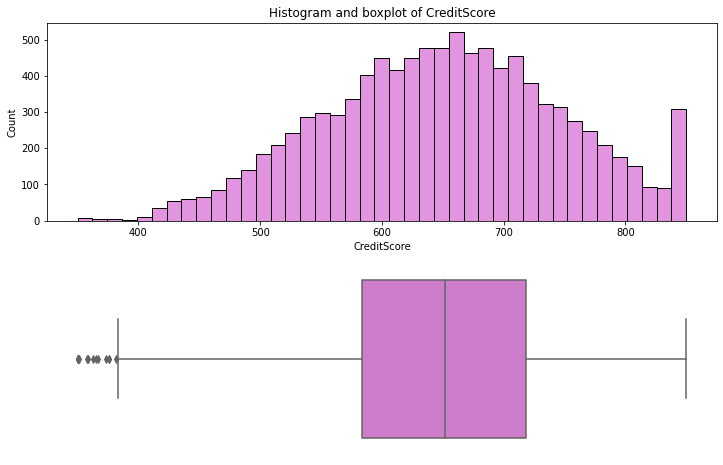

In [212]:
distribution_plt(df.CreditScore, 'CreditScore')

In [213]:
credit = df[['CreditScore','Exited']]
credit

,CreditScore,Exited
0,619,1
1,608,0
2,502,1
3,699,0
4,850,0
...,...,...
9995,771,0
9996,516,0
9997,709,1
9998,772,1


In [214]:
# 경고 무시
import warnings
warnings.filterwarnings(action = 'ignore')

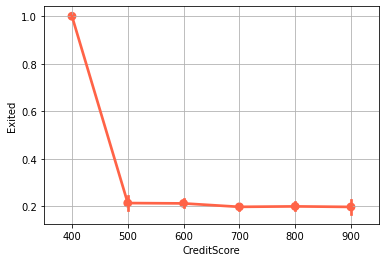

In [215]:
credit['CreditScore'] = pd.cut(credit['CreditScore'], bins=[0,400,500,600,700,800,900], 
                               labels=[400,500,600,700,800,900])
sns.pointplot(x='CreditScore', y='Exited', data=credit, color=colors[3])
plt.grid()
plt.show()

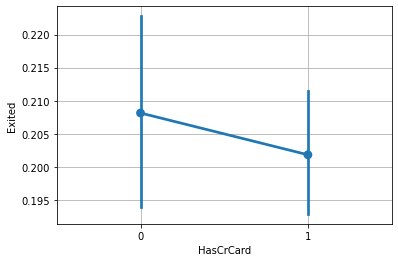

In [216]:
# 신용카드 유무의 이탈율 확인
sns.pointplot(x='HasCrCard', y='Exited', data=df)
plt.grid()
plt.show()

## 데이터 전처리

### 라벨인코더

In [217]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Geography']
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [218]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### 구간화하기(나이)

In [219]:
def age_category(age):
    age = int(np.floor(age // 10))
    return age
# 나이 몫만 구해서 카테고리화 시키기

In [220]:
df['Age_category'] = df.Age.apply(age_category)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Age_category     10000 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.1+ MB


### 필요없는 컬럼 제거

In [222]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [223]:
df = df.drop(columns=['RowNumber','Age','Surname','CustomerId'])

In [224]:
df.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_category
0,619,0,0,2,0.00,1,1,1,101348.88,1,4
1,608,2,0,1,83807.86,1,0,1,112542.58,0,4
2,502,0,0,8,159660.80,3,1,0,113931.57,1,4
3,699,0,0,1,0.00,2,0,0,93826.63,0,3
4,850,2,0,2,125510.82,1,1,1,79084.10,0,4


### 구간화2(신용점수)

In [226]:
df['CreditScore'].unique()[:5]
# 신용점수도 9등급처럼 존재하듯이 이것도 9등급으로 비닝시켜 구간화 진행

array([619, 608, 502, 699, 850])

In [227]:
score = list(df['CreditScore'])
bins = [100,200,300,400,500,600,700,800,900,1000]
labels = [9,8,7,6,5,4,3,2,1]
df['CreditScore'] = pd.cut(df['CreditScore'],bins=bins,labels=labels)
# 신용점수가 높은것이 높은 등급을 받아야 하므로 라벨링을 바꿔서 해줌

In [228]:
df.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_category
0,4,0,0,2,0.00,1,1,1,101348.88,1,4
1,4,2,0,1,83807.86,1,0,1,112542.58,0,4
2,5,0,0,8,159660.80,3,1,0,113931.57,1,4
3,4,0,0,1,0.00,2,0,0,93826.63,0,3
4,2,2,0,2,125510.82,1,1,1,79084.10,0,4


In [229]:
df.CreditScore.value_counts()

4    3818
3    2471
5    2423
2     645
6     624
7      19
9       0
8       0
1       0
Name: CreditScore, dtype: int64

In [230]:
df['CreditScore'] = df['CreditScore'].astype(int)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  Age_category     10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [232]:
df.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_category
0,4,0,0,2,0.00,1,1,1,101348.88,1,4
1,4,2,0,1,83807.86,1,0,1,112542.58,0,4
2,5,0,0,8,159660.80,3,1,0,113931.57,1,4
3,4,0,0,1,0.00,2,0,0,93826.63,0,3
4,2,2,0,2,125510.82,1,1,1,79084.10,0,4


## 종속변수 생성

In [233]:
y = df.pop('Exited').values.copy()
X = df.copy()
X.shape, y.shape

((10000, 10), (10000,))

### 데이터 셋 분리

In [234]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te=train_test_split(X,y,
                                     test_size=0.3)

In [235]:
print(X_tr.shape, y_tr.shape)

(7000, 10) (7000,)


* standard scaler면 표준편차랑 평균 이용하는데 오로지 훈련셋만의 기준으로 스케일링 한 후에 테스트 셋도 훈련셋의 기준으로 해야해서 먼저 데이터셋을 분리한 후 표준화를 진행해야 함

### 데이터 표준화

In [236]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_tr[['Balance','EstimatedSalary']] = std.fit_transform(X_tr[['Balance','EstimatedSalary']])
X_te[['Balance','EstimatedSalary']] = std.transform(X_te[['Balance','EstimatedSalary']])

* X = X.values를 한다면 표준화 진행이 되지않는다.

In [237]:
# df -> 배열로 변환
X_tr = X_tr.values
X_te = X_te.values

# 딥러닝

In [309]:
# first layer
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Dense(units=1, activation='sigmoid',
                             input_shape=(10,)))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [310]:
from sklearn.linear_model import SGDClassifier

In [311]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

model_history = model.fit(X_tr, y_tr, validation_split = 0.2, 
                          validation_data = (X_te, y_te), epochs = 100,)

Epoch 1/100
175/175 [==============================] - 1s 3ms/step - loss: 0.6800 - binary_accuracy: 0.7177 - val_loss: 0.5686 - val_binary_accuracy: 0.7607
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 0.5490 - binary_accuracy: 0.7768 - val_loss: 0.5302 - val_binary_accuracy: 0.7829
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 0.5164 - binary_accuracy: 0.7879 - val_loss: 0.5051 - val_binary_accuracy: 0.7879
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4967 - binary_accuracy: 0.7925 - val_loss: 0.4903 - val_binary_accuracy: 0.7914
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4836 - binary_accuracy: 0.7961 - val_loss: 0.4814 - val_binary_accuracy: 0.7921
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4755 - binary_accuracy: 0.7968 - val_loss: 0.4746 - val_binary_accuracy: 0.7936
Epoch 7/100
175/175 [==============================] - 0s 

In [312]:
pred = model.predict(X_te)

In [313]:
pred_label = (pred > 0.5).astype('int').reshape((-1,))
# true면 1, false면 0 반환 -> 1차원 배열로 reshape
pred_label[:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [314]:
np.mean(y_te == pred_label)

0.807

In [315]:
acc = model.evaluate(X_te, y_te)[1]
print(f'Accuracy of model is {acc}')

94/94 [==============================] - 0s 1ms/step - loss: 0.4422 - binary_accuracy: 0.8070
Accuracy of model is 0.8069999814033508


# 은닉층 추가

In [330]:
# tensorflow, keras
import tensorflow as tf
from tensorflow import keras
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=5,
                              activation='elu',
                              input_shape=(10,)))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 5)                 55        
                                                                 
 dense_29 (Dense)            (None, 1)                 6         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [331]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_cnn_model.h5',
                                                save_best_only=True)
early_stop_cb = keras.callbacks.EarlyStopping(patience=3,
                                              restore_best_weights=True)

In [332]:
ann_history = ann.fit(x=X_tr, y= y_tr ,epochs=100,
                  callbacks=[checkpoint_cb, early_stop_cb],
                    validation_data=(X_te, y_te))

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 0.7909 - accuracy: 0.5807 - val_loss: 0.5208 - val_accuracy: 0.7987
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.5136 - accuracy: 0.7949 - val_loss: 0.5099 - val_accuracy: 0.7993
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7950 - val_loss: 0.5003 - val_accuracy: 0.7993
Epoch 4/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4938 - accuracy: 0.7950 - val_loss: 0.4906 - val_accuracy: 0.7993
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7949 - val_loss: 0.4806 - val_accuracy: 0.7993
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4744 - accuracy: 0.7953 - val_loss: 0.4709 - val_accuracy: 0.8000
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4653 - accuracy: 0.7959 - val_loss: 0.4629 - val_accuracy: 0.8010

In [333]:
pred = ann.predict(X_te)

In [334]:
pred_label = (pred > 0.5).astype('int').reshape(-1,)
np.mean(y_te == pred_label)

0.8316666666666667

In [335]:
ann_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [336]:
acc2 = ann.evaluate(X_te, y_te)[1]
print(f'Accuracy of model is {acc2}')

94/94 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8317
Accuracy of model is 0.8316666483879089


In [337]:
df = pd.DataFrame(ann_history.history)
df[:5]

,loss,accuracy,val_loss,val_accuracy
0,0.790949,0.580714,0.520832,0.798667
1,0.513551,0.794857,0.509865,0.799333
2,0.503552,0.795000,0.500280,0.799333
3,0.493850,0.795000,0.490555,0.799333
4,0.484184,0.794857,0.480562,0.799333


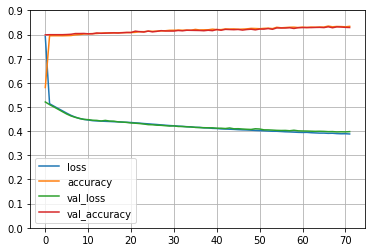

In [338]:
df.plot()
plt.grid()
plt.yticks(np.arange(0, 1, 0.1))
plt.show()

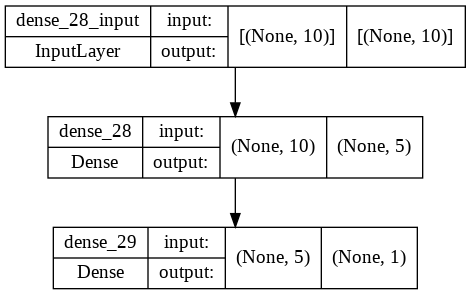

In [339]:
from tensorflow.keras.utils import plot_model
plot_model(ann, show_shapes = True)

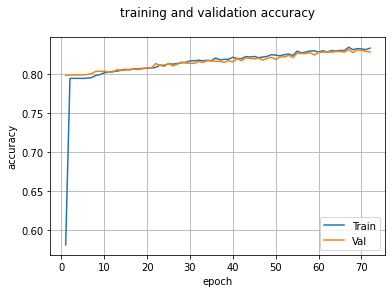

In [349]:
train_acc = ann_history.history['accuracy']
val_acc = ann_history.history['val_accuracy']

epoch = range(1,73)
sns.lineplot(epoch, train_acc, label = 'Train')
sns.lineplot(epoch, val_acc, label = 'Val')

plt.title('training and validation accuracy\n')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend()
plt.show()